# Building a Simple NLP Spam Dectector

## 1.0 Loading our Data

In [2]:
import numpy as np
import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/spam.csv"
data = pd.read_csv(file_name, encoding = "latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Let's rename our columns to something a bit more interpretable and extract only the columns we need

In [3]:
data = data[['v1', 'v2']]
data = data.rename(columns = {'v1': 'label', 'v2': 'text'})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
data.label.unique()

array(['ham', 'spam'], dtype=object)

In [6]:
# percentage of missing values in each column
round(100 * (data.isnull().sum()/len(data)),2).sort_values(ascending=False)

label    0.0
text     0.0
dtype: float64

In [7]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data[data[['label', 'text']].duplicated() == True]

,label,text
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [9]:
data = data.drop_duplicates()

In [10]:
# Sanity Check to make sure it worked
data[data[['label', 'text']].duplicated() == True]

,label,text


In [11]:
data.shape

(5169, 2)

#### Simple plot of out class label counts

<AxesSubplot:>

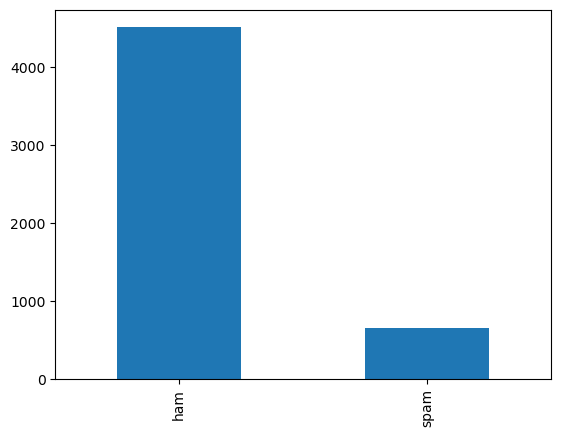

In [12]:
data.label.value_counts().plot(kind="bar")

# 2. Building our Spam/Ham Classifer

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def review_messages(msg):
    # converting messages to lowercase
    msg = msg.lower()
    return msg

In [14]:
# Processing text messages
data['text'] = data['text'].apply(review_messages)

In [15]:
# Inspect the changes on our data
data

,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


### Preparing our data

In [16]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.1, random_state = 1)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
# training vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

![](https://miro.medium.com/max/3604/0*56JnM18OAx1lhIQb.png)

### Training our model

In [18]:
from sklearn import svm
# training the classifier 
svm = svm.SVC(C=1000)
svm.fit(X_train_vec, y_train)

SVC(C=1000)

In [19]:
# testing against testing set 
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test) 

print("We have an accuracy of: " + str(accuracy_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))
#y_test and y_pred store which are spam or ham
#vectorized data matrix store in which email, which word's tfidf

We have an accuracy of: 0.9845261121856866
[[462   0]
 [  8  47]]


### Predict where your text is Spam or Ham

In [20]:
# test against new messages 
def pred(msg):
    msg = vectorizer.transform([msg])
    prediction = svm.predict(msg)
    return prediction[0]

In [21]:
for i in range(0, 10):
  rand_index = np.random.randint(0, len(data))
  test_sample = data.iloc[rand_index][1]

  print(test_sample)
  print("Text is - " + str(pred(test_sample)) +"\n")

ugh hopefully the asus ppl dont randomly do a reformat.
Text is - ham

aight fuck it, i'll get it later
Text is - ham

aiyah sorry lor... i watch tv watch until i forgot 2 check my phone.
Text is - ham

o was not into fps then.
Text is - ham

... are you in the pub?
Text is - ham

hi babe its me thanks for coming even though it didnt go that well!i just wanted my bed! hope to see you soon love and kisses xxx
Text is - ham

somebody set up a website where you can play hold em using eve online spacebucks
Text is - ham

she doesnt need any test.
Text is - ham

yeah go on then, bored and depressed sittin waitin for phone to ring... hope the wind drops though, scary
Text is - ham

u r a winner u ave been specially selected 2 receive å£1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810710p/min (18 )
Text is - spam



C:\Users\22600\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


dating: 0.003510648997012058
unsubscribe: 0.0035144461886246602
750: 0.0035275644413521644
camera: 0.0036273330148278303
sms: 0.0036275895399660875
awarded: 0.003794722921760416
collection: 0.003844104648757241
shows: 0.0039044361600919057
10p: 0.00391555735975666
line: 0.003969738575285395
msg: 0.004292401416364764
chat: 0.004500889725443996
code: 0.0045494844979917385
receive: 0.004584690888918099
guaranteed: 0.005119261869075234
tone: 0.00522020406795669
latest: 0.005306444512292345
new: 0.005599682023387678
cs: 0.0058299362983382
tones: 0.005867329738190308
http: 0.006063054155013166
draw: 0.006201796947219805
video: 0.006527662312821627
customer: 0.006793904246183226
won: 0.006954446583442488
1000: 0.006971726723729409
100: 0.006985610907477169
cash: 0.00835257191854073
500: 0.00854751407607588
16: 0.008935734521726767
ringtone: 0.00957957428532455
contact: 0.009700583792656033
18: 0.009718381257805416
nokia: 0.010315036088670888
text: 0.010489585445243312
win: 0.01063553135229401

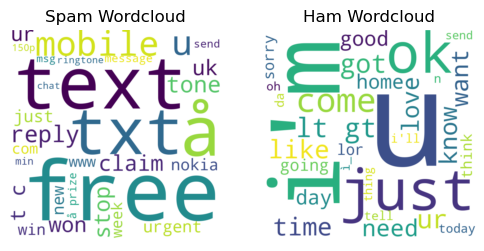

time cost 2.895969867706299


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import time

time_start = time.time()

# Load the data
df = data

# Split the data into training and testing sets
train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)

# Preprocess the data
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train = vectorizer.fit_transform(train['text'])
X_test = vectorizer.transform(test['text'])
y_train = train['label']
y_test = test['label']

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = np.array(vectorizer.get_feature_names())

# Get top features
top_idx = np.argsort(importances)[-50:]
ham_idx = np.argsort(importances)[-50]
top_features = features[top_idx]
top_importances = importances[top_idx]

ham_features = features[ham_idx]

# Print top features and their importances
for feature, importance in zip(top_features, top_importances):
    print(f'{feature}: {importance}')

# Generate word cloud
spam_indices = y_train[y_train == 'spam'].index
spam_text = ' '.join(train.loc[spam_indices, 'text'])
ham_indices = y_train[y_train == 'ham'].index
ham_text = ' '.join(train.loc[ham_indices, 'text'])
wordcloud_spam = WordCloud(width=800, height=800, background_color='white', max_words=30, stopwords=vectorizer.get_stop_words()).generate(spam_text)
wordcloud_ham = WordCloud(width=800, height=800, background_color='white', max_words=30, stopwords=vectorizer.get_stop_words()).generate(ham_text)
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Wordcloud')
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Wordcloud')
plt.show()

# Evaluate model
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

time_end = time.time()
print('time cost',time_end-time_start)

In [33]:
top_idx = np.argsort(importances)[-50:]
ham_idx = np.argsort(importances)[0:50]
top_features = features[top_idx]
top_importances = importances[top_idx]

ham_features = features[ham_idx]

top_coeffs = pd.DataFrame({'spam': top_features,'ham':ham_features})
print(top_coeffs)

           spam             ham
0        dating            jump
1   unsubscribe      possession
2           750           facts
3        camera           faded
4           sms           faggy
5       awarded         faglord
6    collection          failed
7         shows        positive
8           10p           fails
9          line       positions
10          msg        fainting
11         chat            fair
12         code           faith
13      receive            fake
14   guaranteed       falconerf
15         tone        position
16       latest            pose
17          new         falling
18           cs           falls
19        tones         famamus
20         http             pos
21         draw             fan
22        video            port
23     customer        porridge
24          won      poortiyagi
25         1000          poorly
26          100      possessive
27         cash            farm
28          500      facilities
29           16        possibly
30     r

Text(0.5, 1.0, 'Spam Wordcloud')

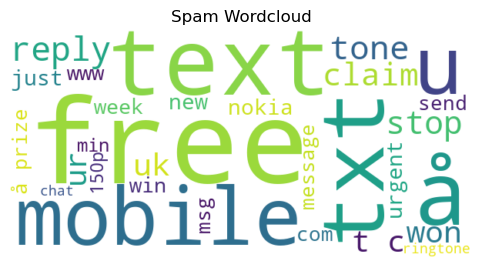

In [36]:
wordcloud_spam = WordCloud(width=600, height=300, background_color='white', max_words=30, stopwords=vectorizer.get_stop_words()).generate(spam_text)
plt.figure(figsize=(6, 3))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Wordcloud')

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import precision_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)

X = vectorizer.fit_transform(data['text'])
y = data['label']

# Perform 10-fold cross-validation
scores = cross_val_score(rf, X, y, cv=10, scoring='f1_macro')

# Print cross-validation scores
print('Cross-validation scores:', scores)

# Print mean and standard deviation of cross-validation scores
print('Mean F1 score:', np.mean(scores))
print('Standard deviation of F1 score:', np.std(scores))

scoring_recall = make_scorer(recall_score, pos_label='spam')
scores_recall = cross_val_score(rf, X, y, cv=10, scoring=scoring_recall)
print('scores_recall:', scores_recall)
print('Mean recall score:', np.mean(scores_recall))
print('Standard deviation of recall score:', np.std(scores_recall))

scoring_precision = make_scorer(precision_score, pos_label='spam')
scores_precision = cross_val_score(rf, X, y, cv=10, scoring=scoring_precision)
print('scores_precision:', scores_precision)
print('Mean precision score:', np.mean(scores_precision))
print('Standard deviation of precision score:', np.std(scores_precision))

Cross-validation scores: [0.97724972 0.95286287 0.9590495  0.94260232 0.93827433 0.9320299
 0.92346977 0.91808107 0.91127002 0.93399123]
Mean F1 score: 0.9388880741059185
Standard deviation of F1 score: 0.018952553798616795
scores_recall: [0.92307692 0.84615385 0.89230769 0.81538462 0.81538462 0.78461538
 0.77272727 0.75757576 0.72727273 0.81538462]
Mean recall score: 0.814988344988345
Standard deviation of recall score: 0.0568611743387275
scores_precision: [1.         1.         0.96666667 1.         0.98148148 1.
 0.98076923 0.98039216 1.         0.96363636]
Mean precision score: 0.9872945899416488
Standard deviation of precision score: 0.013843324163698436


In [41]:


# Print mean and standard deviation of cross-validation scores
print('Mean F1 score:', np.mean(scores))
print('Standard deviation of F1 score:', np.std(scores))

scoring_recall = make_scorer(recall_score, pos_label='spam')
scores_recall = cross_val_score(rf, X, y, cv=10, scoring=scoring_recall)
print('Mean recall score:', np.mean(scores_recall))
print('Standard deviation of recall score:', np.std(scores_recall))

scoring_precision = make_scorer(precision_score, pos_label='spam')
scores_precision = cross_val_score(rf, X, y, cv=10, scoring=scoring_precision)
print('Mean precision score:', np.mean(scores_precision))
print('Standard deviation of precision score:', np.std(scores_precision))

Mean F1 score: 0.9388880741059185
Standard deviation of F1 score: 0.018952553798616795
Mean recall score: 0.814988344988345
Standard deviation of recall score: 0.0568611743387275
Mean precision score: 0.9872945899416488
Standard deviation of precision score: 0.013843324163698436
